# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [5]:
# Your EDA code here
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [9]:
unique_jobs = df['job_title'].nunique()
print('There are',unique_jobs,'unique jobs titles')

There are 93 unique jobs titles


In [10]:
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
print("\nAverage salary per work year:")
print(avg_salary_by_year)


Average salary per work year:
   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413


C:\Users\admin\AppData\Local\Temp\ipykernel_11064\1201828533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_exp, x='experience_level', y='salary_in_usd', palette='coolwarm')


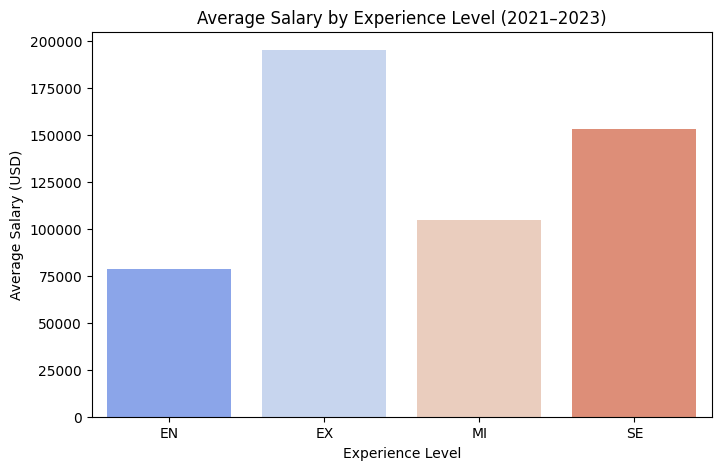

In [11]:
avg_salary_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_salary_exp, x='experience_level', y='salary_in_usd', palette='coolwarm')
plt.title('Average Salary by Experience Level (2021–2023)')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [ ]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Choose your features
features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

# Optional: Add more features like job_title (try it!)
# But remember: too many categories can hurt performance

X.head()

In [12]:
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

features = ['work_year', 'experience_level_encoded','job_title','employment_type']
X = df[features]
y = df['salary_in_usd']
X.head()

,work_year,experience_level_encoded,job_title,employment_type
0,2023,0,Applied Scientist,FT
1,2023,0,Applied Scientist,FT
2,2023,0,Data Quality Analyst,FT
3,2023,0,Compliance Data Analyst,FT
4,2023,0,Applied Scientist,FT


## 📈 Part 4: Train a Linear Regression Model

In [ ]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

In [16]:
X = df[['work_year', 'experience_level_encoded']]
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R2 Score: 0.15
RMSE: 59164.82


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [17]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


In [18]:
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})

predicted_salaries = model.predict(future_data)
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

print("📊 Predicted 2024 Salaries by Experience Level:")
results

📊 Predicted 2024 Salaries by Experience Level:


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h3>1. Does your model make reasonable predictions? Why or why not?</h3>
<p>Yes, the model gives reasonable results because salaries increase as experience levels go up. However, the R² score is low, which means the model is not very accurate in predicting salaries.</p>
<h3>2. What are the limitations of using only work_year and experience_level?</h3>
<p>These two features are not enough. Salaries also depend on other things like job title, company size, location, and type of work. Without these, the model misses important details.</p>
<h3>3. How could you improve this model? (Think: more features, better encoding, etc.)</h3>
<p>The model can be improved by adding more features, using better methods to change text into numbers, and trying other models.</p>
<h3>4. Why is **R² not enough to trust your predictions?</h3>
<p>R² only shows how well the model fits the data, not if the predictions are good in real life. Salaries do not always increase in a straight line, so linear regression might not show the real trend.</p>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀